In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model

C:\Users\Nico Ivander\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv("MSFT.csv",na_values=["null"],index_col="Date",parse_dates=True,infer_datetime_format=True)

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-08,158.929993,160.800003,157.949997,160.089996,158.411835,27746500
2020-01-09,161.839996,162.220001,161.029999,162.089996,160.390869,21385000
2020-01-10,162.820007,163.220001,161.179993,161.339996,159.648727,20725900
2020-01-13,161.759995,163.309998,161.259995,163.279999,161.568405,21626500
2020-01-14,163.389999,163.600006,161.720001,162.130005,160.430450,23477400


In [4]:
df.shape

(253, 6)

In [5]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,193.829209,196.405455,191.270474,193.936324,193.018345,3.781375e+07
std,22.869121,22.370548,23.089195,22.768303,23.144477,1.681806e+07
min,137.009995,140.570007,132.520004,135.419998,134.366470,1.055060e+07
25%,175.800003,178.639999,173.800003,177.039993,175.662643,2.645800e+07
50%,202.089996,204.399994,199.619995,202.539993,201.862274,3.306480e+07
75%,213.399994,215.229996,210.839996,213.250000,212.463760,4.387230e+07
max,229.270004,232.860001,227.350006,231.649994,231.045105,9.707360e+07


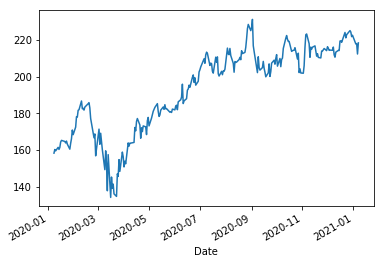

In [6]:
df["Adj Close"].plot()

In [7]:
X=df.drop(["Adj Close"],axis=1)
X=X.drop(["Close"],axis=1)

In [8]:
X.head()

,Open,High,Low,Volume
Date,,,,
2020-01-08,158.929993,160.800003,157.949997,27746500
2020-01-09,161.839996,162.220001,161.029999,21385000
2020-01-10,162.820007,163.220001,161.179993,20725900
2020-01-13,161.759995,163.309998,161.259995,21626500
2020-01-14,163.389999,163.600006,161.720001,23477400


In [9]:
X.corrwith(df["Adj Close"])

Open      0.989364
High      0.994080
Low       0.994660
Volume   -0.579657
dtype: float64

KeyError: 'Adj CLose'

In [10]:
test = df
target_adj_close=pd.DataFrame(df["Adj CLose"])
feature_columns = ["Open","High","Low","Volume"]

KeyError: 'Adj CLose'

In [23]:
scaler=MinMaxScaler()
feature_minmax_transform_data=scaler.fit_transform(test[feature_columns])
feature_minmax_transform=pd.DataFrame(columns=feature_columns, data=feature_minmax_transform,index=test.index)
feature_minmax_transform.head()

NameError: name 'feature_columns' is not defined

In [26]:
target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1] 
target_adj_close = target_adj_close[:90]

validation_x = feature_minmax_transform[-90:-1]
feature_minmax_transform=feature_minmax_transform[:-90]

NameError: name 'target_adj_close' is not defined

In [28]:
ts_split = TimeSeriesSplit(n_splits=10)
for train_index,test_index in ts_split.split(feature_minmax_transform) :
    X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index):]
    Y_train, Y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index):]

NameError: name 'TimeSeriesSplit' is not defined

In [29]:
X_test.shape

NameError: name 'X_test' is not defined

In [30]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)
modelawal = dt.fit(X_train,Y_train)

NameError: name 'X_train' is not defined

In [34]:
X_train = np.array(X_train)
X_test = np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0],1,Y_train.shape[1])
X_tr_t = X_train.reshape(X_test.shape[0],1,X_test.shape[1])

NameError: name 'X_train' is not defined

In [40]:
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizer import Adam
from keras.models import load_model
from keras.models import sequential

K.clearsession()
model=sequential()
model.add(LSTM(16,input_shape=(1,X_train.shape[1]), activation = "relu", return_sequences=False))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
early_stop=EarlyStopping(monitor="loss", patience=5, verbose=1)
history_model_lstm = model.fit(X_tr_t,Y_train,epochs=200,batch_size=8,verbose=1,shuffle=False,callbacks=[early_stop])

ModuleNotFoundError: No module named 'keras'

In [42]:
y_pred_test = model.predict(X_ts_t)

NameError: name 'model' is not defined

In [44]:
plt.plot(Y_test, label="Teoretik")
plt.plot(Y_pred_test, label="Model")
plt.xlabel("index")
plt.ylabel("Nilai Saham")
plt.legend()
plt.show()

NameError: name 'Y_test' is not defined